# Exercise 4 -a)
 ## Import the libraries that we'll use

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import matrix_power

## Create a graph as specified in the exercise

In [2]:
G = nx.Graph()
G.add_edge(0,1,weight=1)
G.add_edge(0,3,weight=1)
G.add_edge(1,2,weight=1)
G.add_edge(1,3,weight=1)
G.add_edge(2,3,weight=1)
G.add_edge(2,4,weight=1)
G.add_edge(2,5,weight=1)
G.add_edge(2,6,weight=1)
G.add_edge(5,6,weight=1)
G = nx.to_undirected(G)
G = nx.convert_node_labels_to_integers(G, first_label=0)

## Plot the graph

/home/flaviokc/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


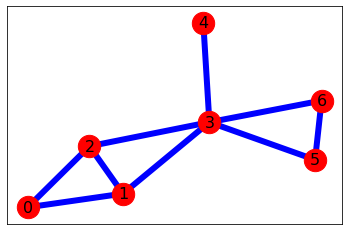

<Figure size 432x288 with 0 Axes>

In [3]:
# Return a dict keyed by node with its coordinates
pos=nx.spring_layout(G)
# Draw the graph using matplot in the background
nx.draw_networkx(G, with_labels=True, node_color='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
# The parameter block=True blocks the execution until the user closes it
plt.show(block=False)
plt.clf()

## Adjacency matrix and transition probability matrix

In [4]:
A = nx.adjacency_matrix(G)

print('\nAdjacency Matrix \n',A.todense())
A = A.todense()
nodes = nx.number_of_nodes(G)
Pij = [[0 for x in range(nodes)] for y in range(nodes)] 
for i in range(nodes):
    degree = nx.degree(G, nbunch=i)
    for j in range(nodes):
        Pij[i][j] = A[i,j]/degree
Pij = np.array(Pij)

print('\nTransition probability matrix Pij \n', Pij)


Adjacency Matrix 
 [[0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 1 0 0 0]
 [0 1 1 0 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1]
 [0 0 0 1 0 1 0]]

Transition probability matrix Pij 
 [[0.         0.5        0.5        0.         0.         0.
  0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.
  0.        ]
 [0.33333333 0.33333333 0.         0.33333333 0.         0.
  0.        ]
 [0.         0.2        0.2        0.         0.2        0.2
  0.2       ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.         0.5        0.         0.
  0.5       ]
 [0.         0.         0.         0.5        0.         0.5
  0.        ]]


## P^n, if n = 100

In [5]:
print('P^100:\n', matrix_power(Pij, 100))

P^100:
 [[0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]]


## P^n, if n = 200

In [6]:
print('P^200:\n', matrix_power(Pij, 200))

P^200:
 [[0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]
 [0.11111111 0.16666667 0.16666667 0.27777778 0.05555556 0.11111111
  0.11111111]]


### So, as we can see, as n increases, P converges to a matrix that indicates the probability of being in one of the nodes of the graph after n steps.

# Exercise 4 -b)

Read the graph

In [7]:
G= nx.read_edgelist("../data/lesmis.txt", create_using=nx.Graph, nodetype=int, data=(('weight',float),)) # Read the network
G = G.to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0)
nodes = nx.number_of_nodes(G)

Calculate the matrix of distances D

In [8]:
if nx.is_connected(G) == True:
    D = [[0 for x in range(nodes)] for y in range(nodes)] # D is the matrix of distances
    vl = []
    for i in range(0,nodes):
        for j in range(i+1, nodes):
            if(i != j):
                aux = nx.shortest_path(G,i,j)
                dij = len(aux)-1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
else: 
    print("The graph has more than one connected component")

## Printing the matrix D

In [9]:
D = np.array(D)
'''
for i in range(nodes):
    for j in range(nodes):
        print("%3.4f"%D[i,j], end=" ")
    print("")
'''

'\nfor i in range(nodes):\n    for j in range(nodes):\n        print("%3.4f"%D[i,j], end=" ")\n    print("")\n'

## Adjacency matrix and transition probability matrix

In [10]:
A = nx.adjacency_matrix(G, weight=None)

A = A.todense()

A³ is calculated this way

In [11]:
A3 = matrix_power(A, 3)

Scatterplot of A³, Dij

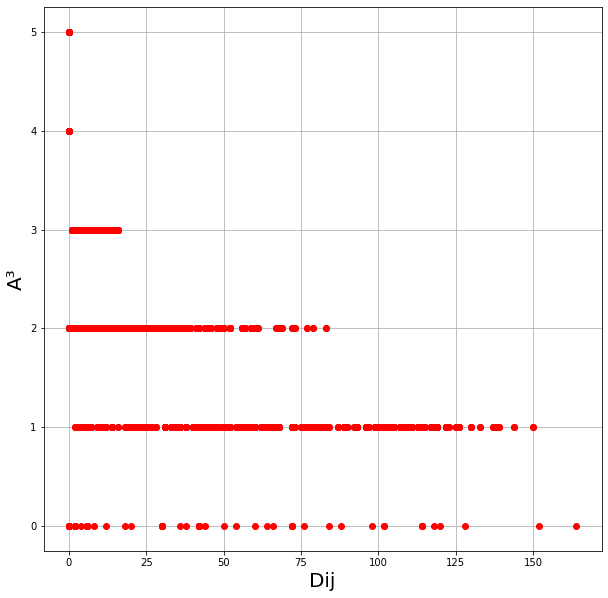

In [12]:
plt.figure(figsize=(10,10))
plt.ylabel("A³", fontsize = 20)
plt.xlabel("Dij", fontsize = 20)
plt.grid(True)
plt.plot(A3, D, 'ro')
plt.show(block=False)

# Exercise 4 -c)
 ## Pearson correlation

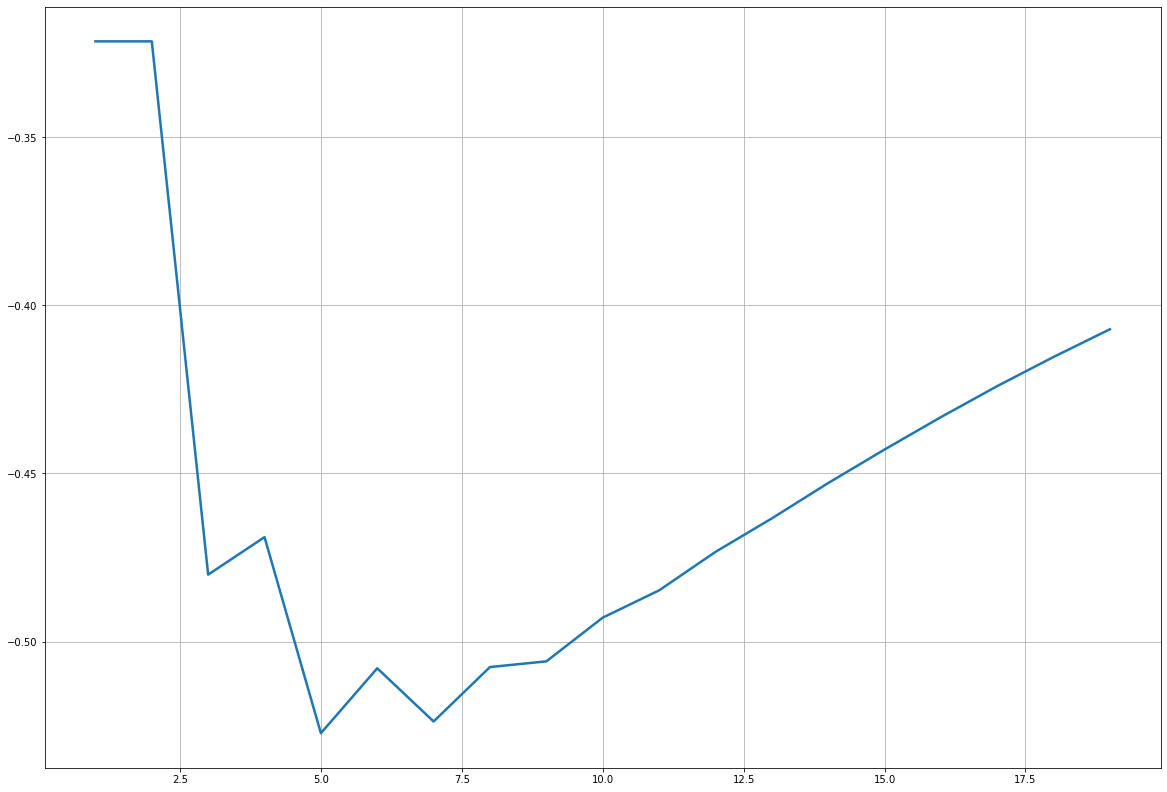

In [13]:
def probability_matrix (A) :
    N = A.shape[0]
    P = np.zeros(shape=(N,N))
    for i in np.arange(0,N):
        for j in np.arange(0,N):
            P[i][j] = A[i][j]/sum(A[i])
    return P

def pow_probability_matrix(P, n):
    P_n = matrixMul(P, n)
    return P_n

def matrix_distance(G):
    N = len(G)
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    if nx.is_connected(G) == True:
        D = np.zeros(shape=(N,N)) # D is the matrix of distances
        vl = []
        for i in np.arange(0,N):
            for j in np.arange(i+1, N):
                if(i != j):
                    aux = nx.shortest_path(G,i,j)
                    dij = len(aux)-1
                    D[i][j] = dij
                    D[j][i] = dij
                    vl.append(dij)
    return D

def matrixMul(a, n):
    if(n == 1):
        return a
    else:
        tempArr = a;
        for i in range(1, n-1):
            tempArr = np.matmul(a, tempArr)
    return tempArr


A_lesmis = nx.adjacency_matrix(G).toarray()
P_lesmis = probability_matrix(A_lesmis)
D_lesmis = matrix_distance(G)
D_lesmis.shape
D_lesmis_aux = D_lesmis.flatten()
vcoef = []
i_list = []

for i in np.arange(1, 20):
    P_lesmis_aux = (pow_probability_matrix(P_lesmis, i)).flatten()
    mcoef = np.corrcoef(D_lesmis_aux, P_lesmis_aux)
    vcoef.append(mcoef[0][1])
    i_list.append(i)
    
    
plt.figure(figsize=(20, 14))
plt.plot(i_list, vcoef, linewidth=2.5)  
plt.grid(True)
plt.show(block=True)